### Import des bibliothèques

In [1]:
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
import pandas as pan
import PIL
from PIL import Image
import os
from os import path

print(tf.__version__)

1.13.1


In [2]:
train_dir_path = 'Train/'
test_dir_path = 'Test/'

### Modification des noms de dossiers pour les raccoucirs (Dossier de Train)

counter = 1
for i in os.listdir(train_dir_path):
    if(path.isdir(path.join(train_dir_path,i))):
        os.rename(path.join(train_dir_path,i),path.join(train_dir_path,str(counter)))
        counter+=1

### Modification des noms de dossiers pour les raccourcirs (Dossier de Test)

counter = 1
for i in os.listdir(test_dir_path):
    if(path.isdir(path.join(test_dir_path,i))):
        os.rename(path.join(test_dir_path,i),path.join(test_dir_path,str(counter)))
        counter+=1

### Parcours des dossiers pour récupérer les images et leurs associer une classe de 0 à 61 (Train)

In [3]:
img_list = []
class_counter = 0
class_list = []
for i in os.listdir(train_dir_path):
    if(path.isdir(path.join(train_dir_path,i))):
        for j in os.listdir(path.join(train_dir_path,i)):
            if(j.endswith('.ppm')):
                class_list.append(class_counter)
                img_list.append(np.array(Image.open(os.path.join(os.path.join(train_dir_path,i),j)).resize((28, 28), PIL.Image.ANTIALIAS).crop((2,2,24,24))))
        class_counter +=1

### Parcours des dossiers pour récupérer les images et leurs associer une classe de 0 à 61 (Test)

In [4]:
img_test_list = []
class_counter = 0
class_test_list = []
for i in os.listdir(test_dir_path):
    if(path.isdir(path.join(test_dir_path,i))):
        for j in os.listdir(path.join(test_dir_path,i)):
            if(j.endswith('.ppm')):
                class_test_list.append(class_counter)
                img_test_list.append(np.array(Image.open(os.path.join(os.path.join(test_dir_path,i),j)).resize((28, 28), PIL.Image.ANTIALIAS).crop((2,2,24,24))))
        class_counter +=1

### Définission de X_train_images, y_train_labels, X_test_images et y_train_labels

In [5]:
X_train_images = np.array(img_list)

In [6]:
y_train_labels = np.array(class_list)

In [7]:
X_test_images = np.array(img_test_list)

In [8]:
X_test_images.shape

(2520, 22, 22, 3)

In [9]:
y_test_labels = np.array(class_test_list)

### Normalisation

In [10]:
vol_shape = X_train_images.shape[:-1]

In [11]:
n_voxels = np.prod(vol_shape)

In [12]:
voxel_by_time = X_train_images.reshape(n_voxels,X_train_images.shape[-1])

In [13]:
scaler = StandardScaler()
X_train_images = scaler.fit_transform(voxel_by_time)

c:\programdata\miniconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
c:\programdata\miniconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [15]:
X_train_images = X_train_images.reshape(4575,22,22,3)

In [16]:
vol_shape = X_test_images.shape[:-1]

In [17]:
n_voxels = np.prod(vol_shape)

In [18]:
voxel_by_time = X_test_images.reshape(n_voxels,X_test_images.shape[-1])

In [19]:
X_test_images = scaler.fit_transform(voxel_by_time)

c:\programdata\miniconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
c:\programdata\miniconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [20]:
X_test_images = X_test_images.reshape(2520,22,22,3)

### Observation du contenu des variables

In [21]:
X_train_images.shape

(4575, 22, 22, 3)

In [22]:
len(X_train_images)

4575

In [23]:
y_train_labels

array([ 0,  0,  0, ..., 61, 61, 61])

In [24]:
X_test_images.shape

(2520, 22, 22, 3)

In [25]:
len(y_test_labels)

2520

### Affichage des 50 premières images de panneaux

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

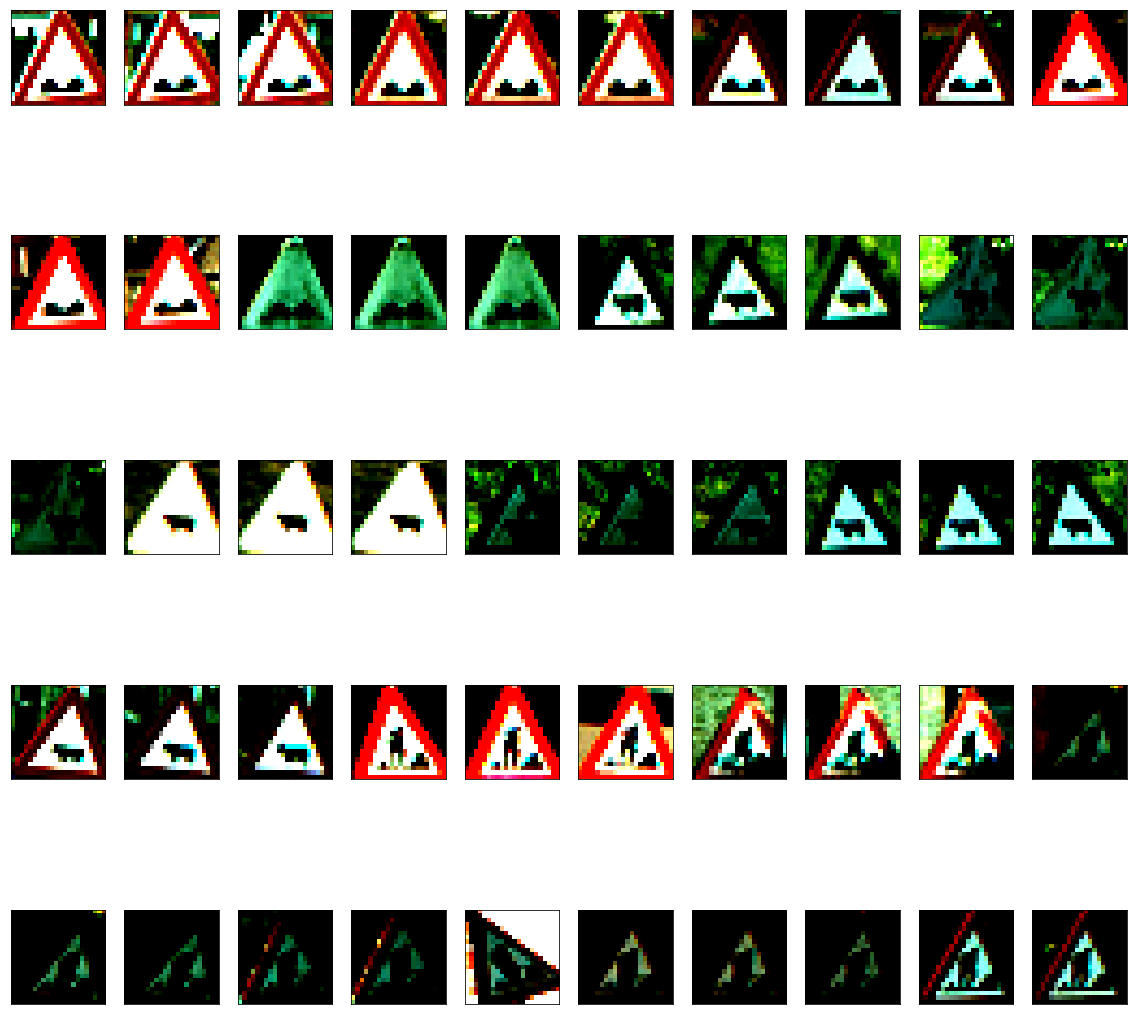

In [26]:
plt.figure(figsize=(20,20))
for i in range(50):
    plt.subplot(5,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train_images[i])

### Normalisation

### Création du modèle

In [44]:
model = keras.Sequential()

In [45]:
model.add(keras.layers.Conv2D(128,kernel_size=(6,6),input_shape=(22,22,3)))

In [46]:
model.add(keras.layers.MaxPool2D(pool_size=(2,2)))

In [47]:
model.add(keras.layers.Conv2D(256,kernel_size=(4,4),strides=2))

In [48]:
model.add(keras.layers.MaxPool2D(pool_size=(2,2)))

In [49]:
model.add(keras.layers.Flatten())

In [50]:
model.add(keras.layers.Dense(512,activation='relu'))

In [51]:
model.add(keras.layers.Dropout(0.25))

In [52]:
model.add(keras.layers.Dense(62,activation='softmax'))

In [53]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 17, 17, 128)       13952     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 256)         524544    
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 1, 1, 256)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               131584    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
__________

In [54]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [55]:
callbacks = [
    keras.callbacks.EarlyStopping(patience=20),
    keras.callbacks.ModelCheckpoint('best_signaux.h5',save_best_only=True)
]

In [56]:
history = model.fit(X_train_images,y_train_labels,callbacks=callbacks,epochs=100,batch_size=32,validation_data=(X_test_images,y_test_labels))

Train on 4575 samples, validate on 2520 samples
Epoch 1/100
4575/4575 [==============================] - 10s 2ms/sample - loss: 1.2306 - acc: 0.7158 - val_loss: 0.6328 - val_acc: 0.8349
Epoch 2/100
4575/4575 [==============================] - 9s 2ms/sample - loss: 0.4109 - acc: 0.8962 - val_loss: 0.3849 - val_acc: 0.8988
Epoch 3/100
4575/4575 [==============================] - 9s 2ms/sample - loss: 0.2503 - acc: 0.9287 - val_loss: 0.4636 - val_acc: 0.8810
Epoch 4/100
4575/4575 [==============================] - 9s 2ms/sample - loss: 0.2133 - acc: 0.9440 - val_loss: 0.4368 - val_acc: 0.9004
Epoch 5/100
4575/4575 [==============================] - 9s 2ms/sample - loss: 0.1862 - acc: 0.9489 - val_loss: 0.4821 - val_acc: 0.8940
Epoch 6/100
4575/4575 [==============================] - 9s 2ms/sample - loss: 0.1406 - acc: 0.9611 - val_loss: 0.3667 - val_acc: 0.9286
Epoch 7/100
4575/4575 [==============================] - 9s 2ms/sample - loss: 0.1703 - acc: 0.9580 - val_loss: 0.4455 - val_acc:

### Observation des résultats

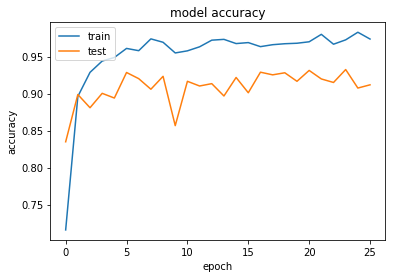

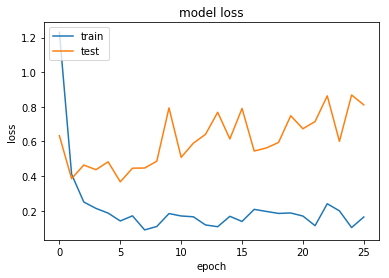

In [57]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

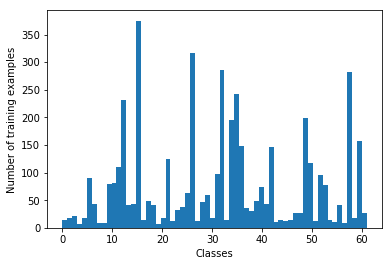

In [58]:
plt.hist(y_train_labels,62)
plt.xlabel("Classes")
plt.ylabel('Number of training examples')
plt.show()

### Évaluation du meilleur modèle

In [60]:
model = keras.models.load_model('best_signaux.h5')
test_loss, test_acc = model.evaluate(X_test_images, y_test_labels)

print('Test accuracy:', test_acc)
print('Test loss:', test_loss)

2520/2520 [==============================] - 2s 607us/sample - loss: 0.3667 - acc: 0.9286
Test accuracy: 0.9285714
Test loss: 0.36672574747677167


### Prédiction

In [61]:
prediction = model.predict(X_test_images)

In [62]:
prediction[0]

array([3.98250371e-01, 1.73710424e-09, 5.23705281e-11, 8.32348945e-09,
       9.17694187e-09, 2.86928007e-05, 1.99662350e-06, 4.64854093e-11,
       2.88964202e-07, 1.28225700e-15, 1.20931032e-09, 6.01300538e-01,
       9.20229084e-12, 4.11256836e-12, 5.90177863e-12, 9.99075489e-10,
       2.91324538e-12, 4.07414033e-12, 5.51084282e-11, 3.59044461e-10,
       1.60054896e-07, 4.47357849e-08, 2.19993301e-10, 1.61512361e-14,
       9.11619006e-14, 8.63807535e-16, 2.63523457e-11, 8.56478733e-13,
       2.51570986e-11, 4.08134859e-09, 4.31096092e-09, 6.34514663e-10,
       8.27403215e-11, 1.98296271e-04, 4.54959421e-12, 1.23121999e-10,
       5.99583881e-12, 2.86314982e-12, 2.48331800e-09, 2.45483447e-14,
       5.55717711e-12, 2.40350462e-10, 1.13478905e-11, 1.34487788e-12,
       2.30450015e-09, 1.31339319e-12, 1.65167532e-11, 3.60276154e-12,
       3.10379333e-14, 5.31599452e-11, 4.29533104e-10, 7.65286792e-12,
       4.90070397e-12, 8.97449406e-11, 3.08145565e-10, 5.14103737e-09,
      

In [63]:
np.argmax(prediction[0])

11

In [64]:
model.predict_classes(X_test_images)

array([11,  0,  0, ..., 61, 61, 61], dtype=int64)

In [65]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(62), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
 
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


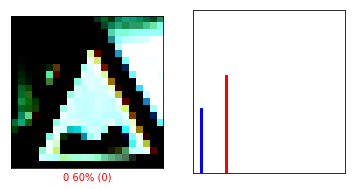

In [66]:
class_names = class_list
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i,prediction,y_test_labels,X_test_images)
plt.subplot(1,2,2)
plot_value_array(i,prediction,y_test_labels)
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

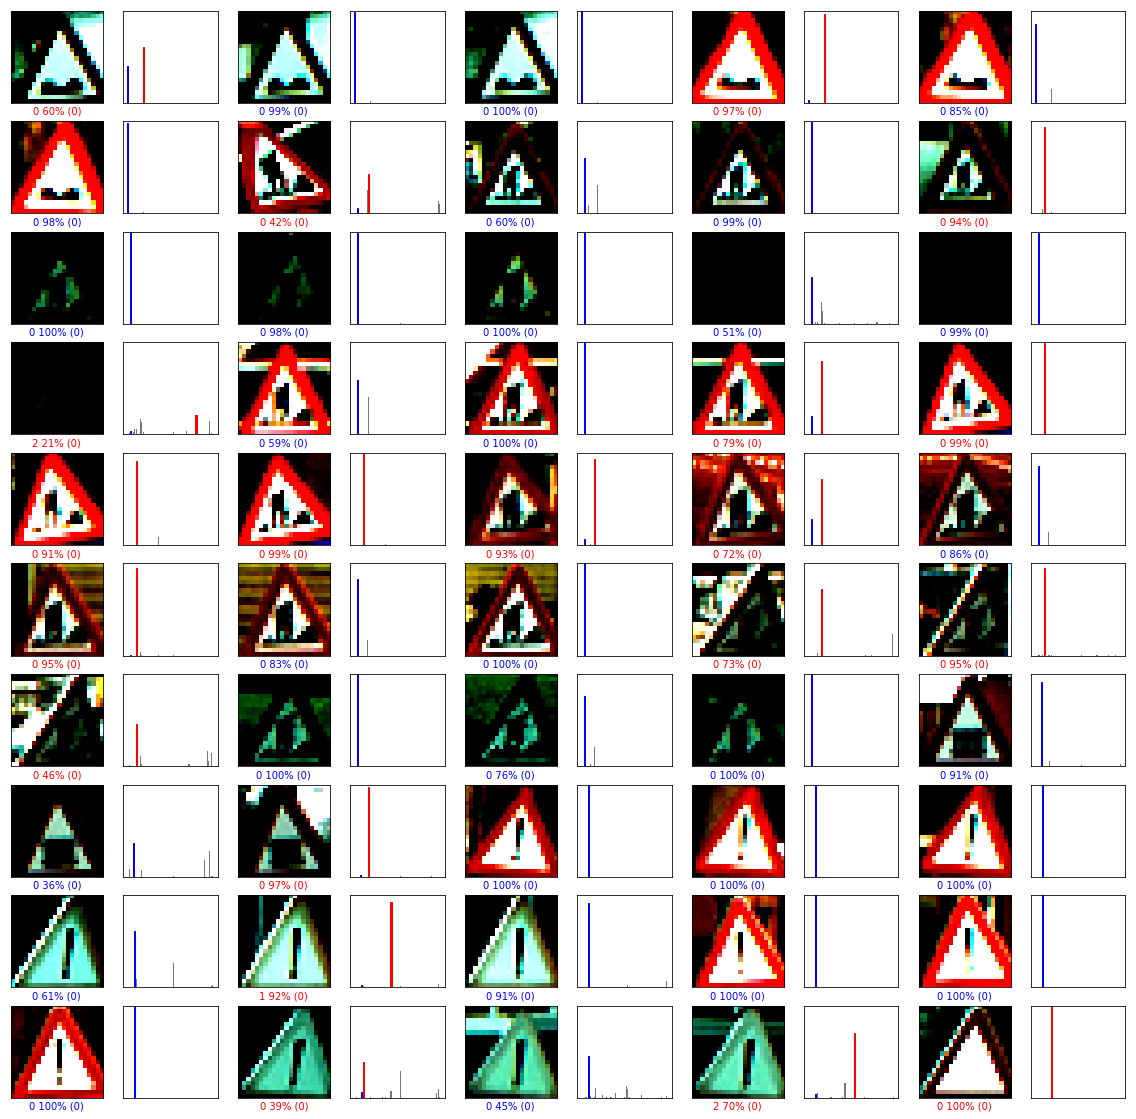

In [67]:
num_rows = 10
num_cols = 5
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, prediction, y_test_labels, X_test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, prediction, y_test_labels)
plt.show()